### Step 1: Load and preview the data

In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load the CSV file
df = pd.read_csv(r"D:/Projects/career-counsellor-ml/data/raw/cs_students.csv")

In [4]:
#Show the shape and top 5 rows
print("Shape of the dataset : ", df.shape)
df.head()

Shape of the dataset :  (180, 12)


,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


### Step 2: Understand the columns

In [5]:
#Understanding the data types of columns and its properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    object 
 10  SQL                180 non-null    object 
 11  Java               180 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.0+ KB


In [6]:
#Understand a few statistics of the dataset
df.describe(include = "all")

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
count,180.000000,180,180,180.000000,180.000000,180,180,180,180,180,180,180
unique,NaN,89,2,NaN,NaN,1,27,65,33,3,3,3
top,NaN,James Wilson,Male,NaN,NaN,Computer Science,Artificial Intelligence,Natural Language Processing,Web Developer,Strong,Strong,Strong
freq,NaN,8,102,NaN,NaN,180,19,14,19,70,79,69
mean,90.500000,NaN,NaN,22.116667,3.615000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,52.105662,NaN,NaN,2.823040,0.177341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,45.750000,NaN,NaN,21.000000,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,90.500000,NaN,NaN,22.000000,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,135.250000,NaN,NaN,22.250000,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 3: Check for missing values

In [7]:
df.isnull().sum()

Student ID           0
Name                 0
Gender               0
Age                  0
GPA                  0
Major                0
Interested Domain    0
Projects             0
Future Career        0
Python               0
SQL                  0
Java                 0
dtype: int64

Up untill here, the dataset has been loaded and an initial analysis has been done to get a general idea of the dataset. Now lets gather insights from the data.

### Step 4: Initial Visualizations

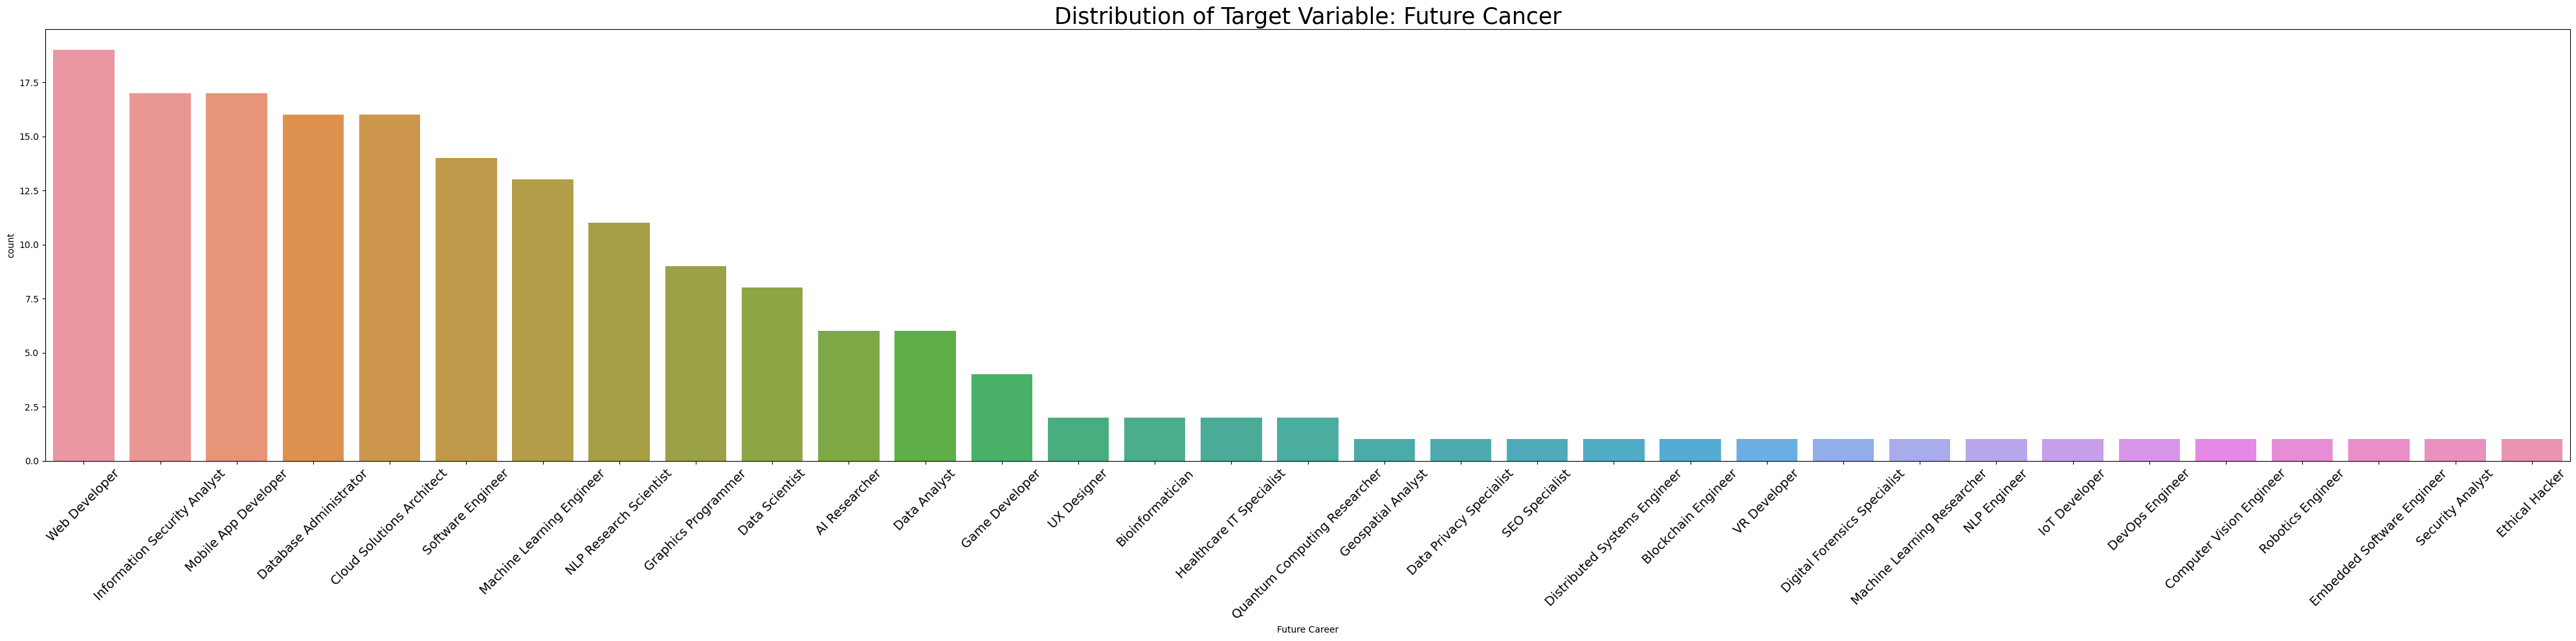

In [8]:
#Plotting the target variable(Future Career)
plt.figure(figsize=(40,10))

#Matplotlib Implementation
#df['Future Career'].value_counts().plot(kind='bar')

#Seaborn Implementation
sns.countplot(data=df, x='Future Career', order=df['Future Career'].value_counts().index)

plt.title("Distribution of Target Variable: Future Cancer", fontsize=25)
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()

Looking at the above graph, it is clearly visible that there is class imbalance, especially for the last majority of careers. Need to take care of this using balancing techniques/ sampling methods.

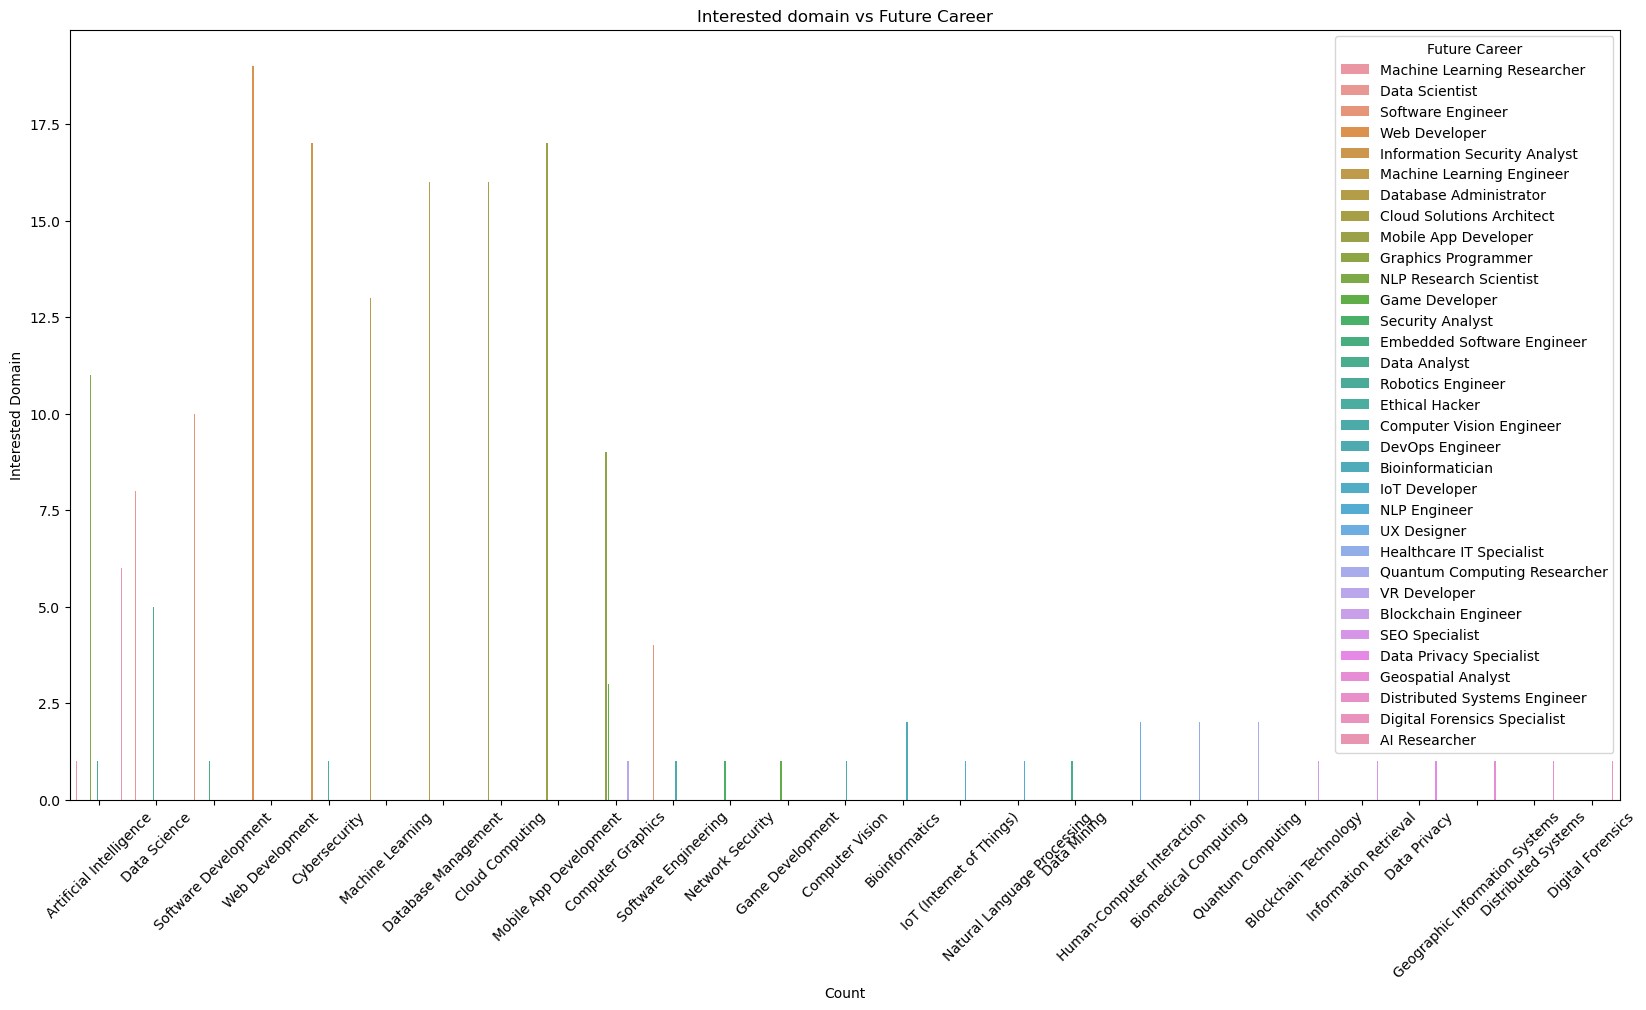

In [12]:
#Interested domain vs Future career
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Interested Domain', hue='Future Career')
plt.title("Interested domain vs Future Career")
plt.xticks(rotation=45)
plt.xlabel('Count')
plt.ylabel('Interested Domain')
plt.show()

While experimenting and plotting a countplot, I am not able to derive much insights as there are so many categories with very similar colors (the thin lines sre also causing problems). While researching, came across a pivot table + heatmap combination which works wonders when you want to create a "VS" graph with a variety of categories (10+ categories)

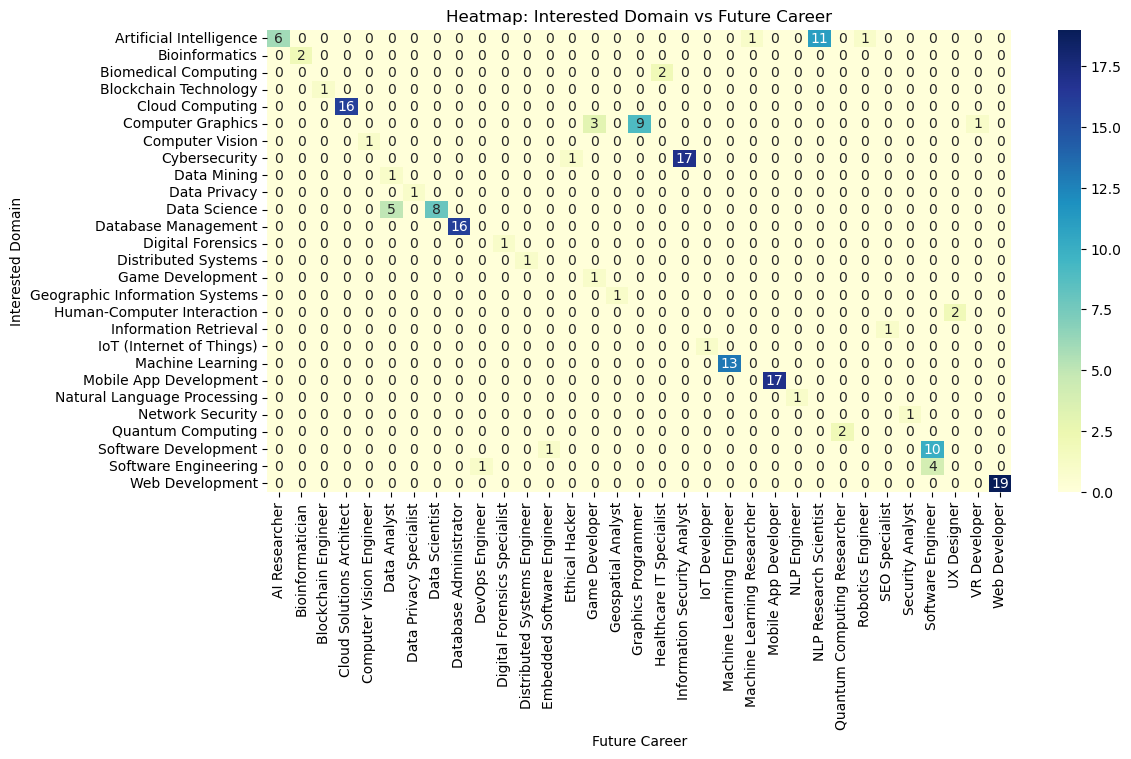

In [13]:
pivot_table = df.pivot_table(index='Interested Domain', columns='Future Career', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Interested Domain vs Future Career')
plt.xlabel('Future Career')
plt.ylabel('Interested Domain')
plt.show()


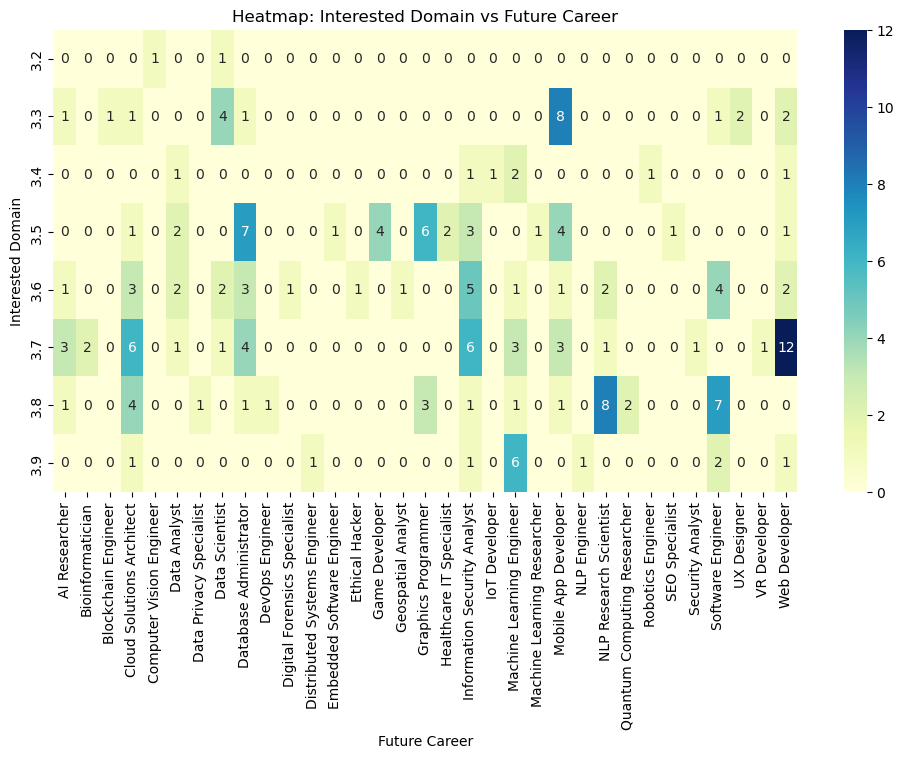

In [22]:
pivot_table = df.pivot_table(index='GPA', columns='Future Career', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Interested Domain vs Future Career')
plt.xlabel('Future Career')
plt.ylabel('Interested Domain')
plt.show()

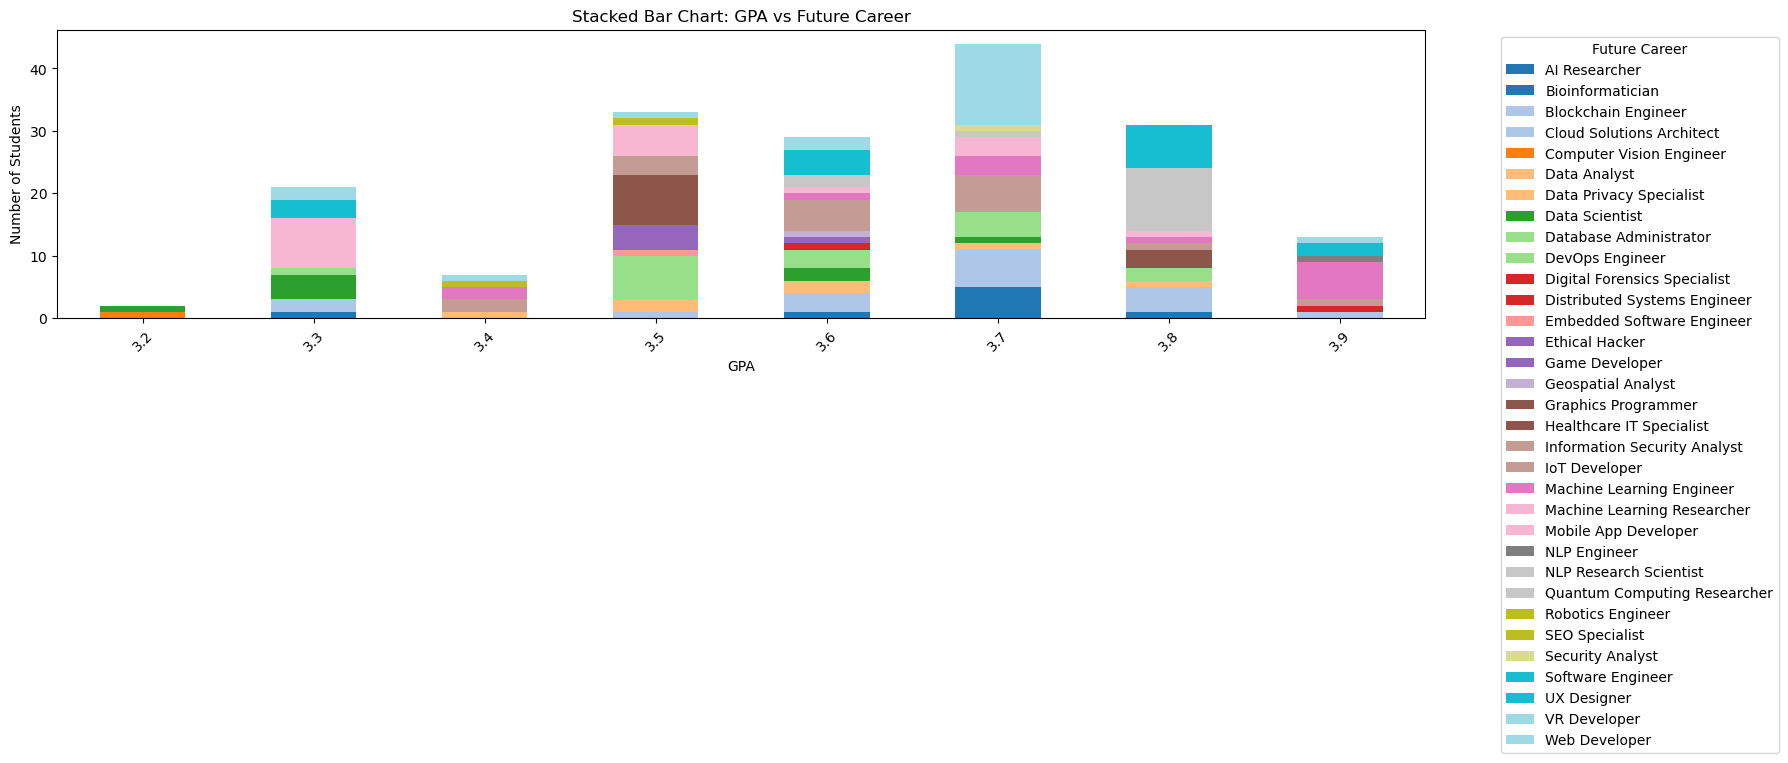

In [26]:
# Group by GPA and Future Career, then reshape
gpa_career = df.groupby(['GPA','Future Career']).size().unstack(fill_value=0)

# Plot the stacked bar chart
gpa_career.plot(kind='bar', stacked=True, figsize=(18, 6), colormap='tab20')
plt.title('Stacked Bar Chart: GPA vs Future Career')
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Future Career', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

I just wanted to try out a stacked bar graph, but as is visible, due to a lot of categories and the colors being very similar, the graph becomes a bit cluttered and gatherinf insights is not possible.

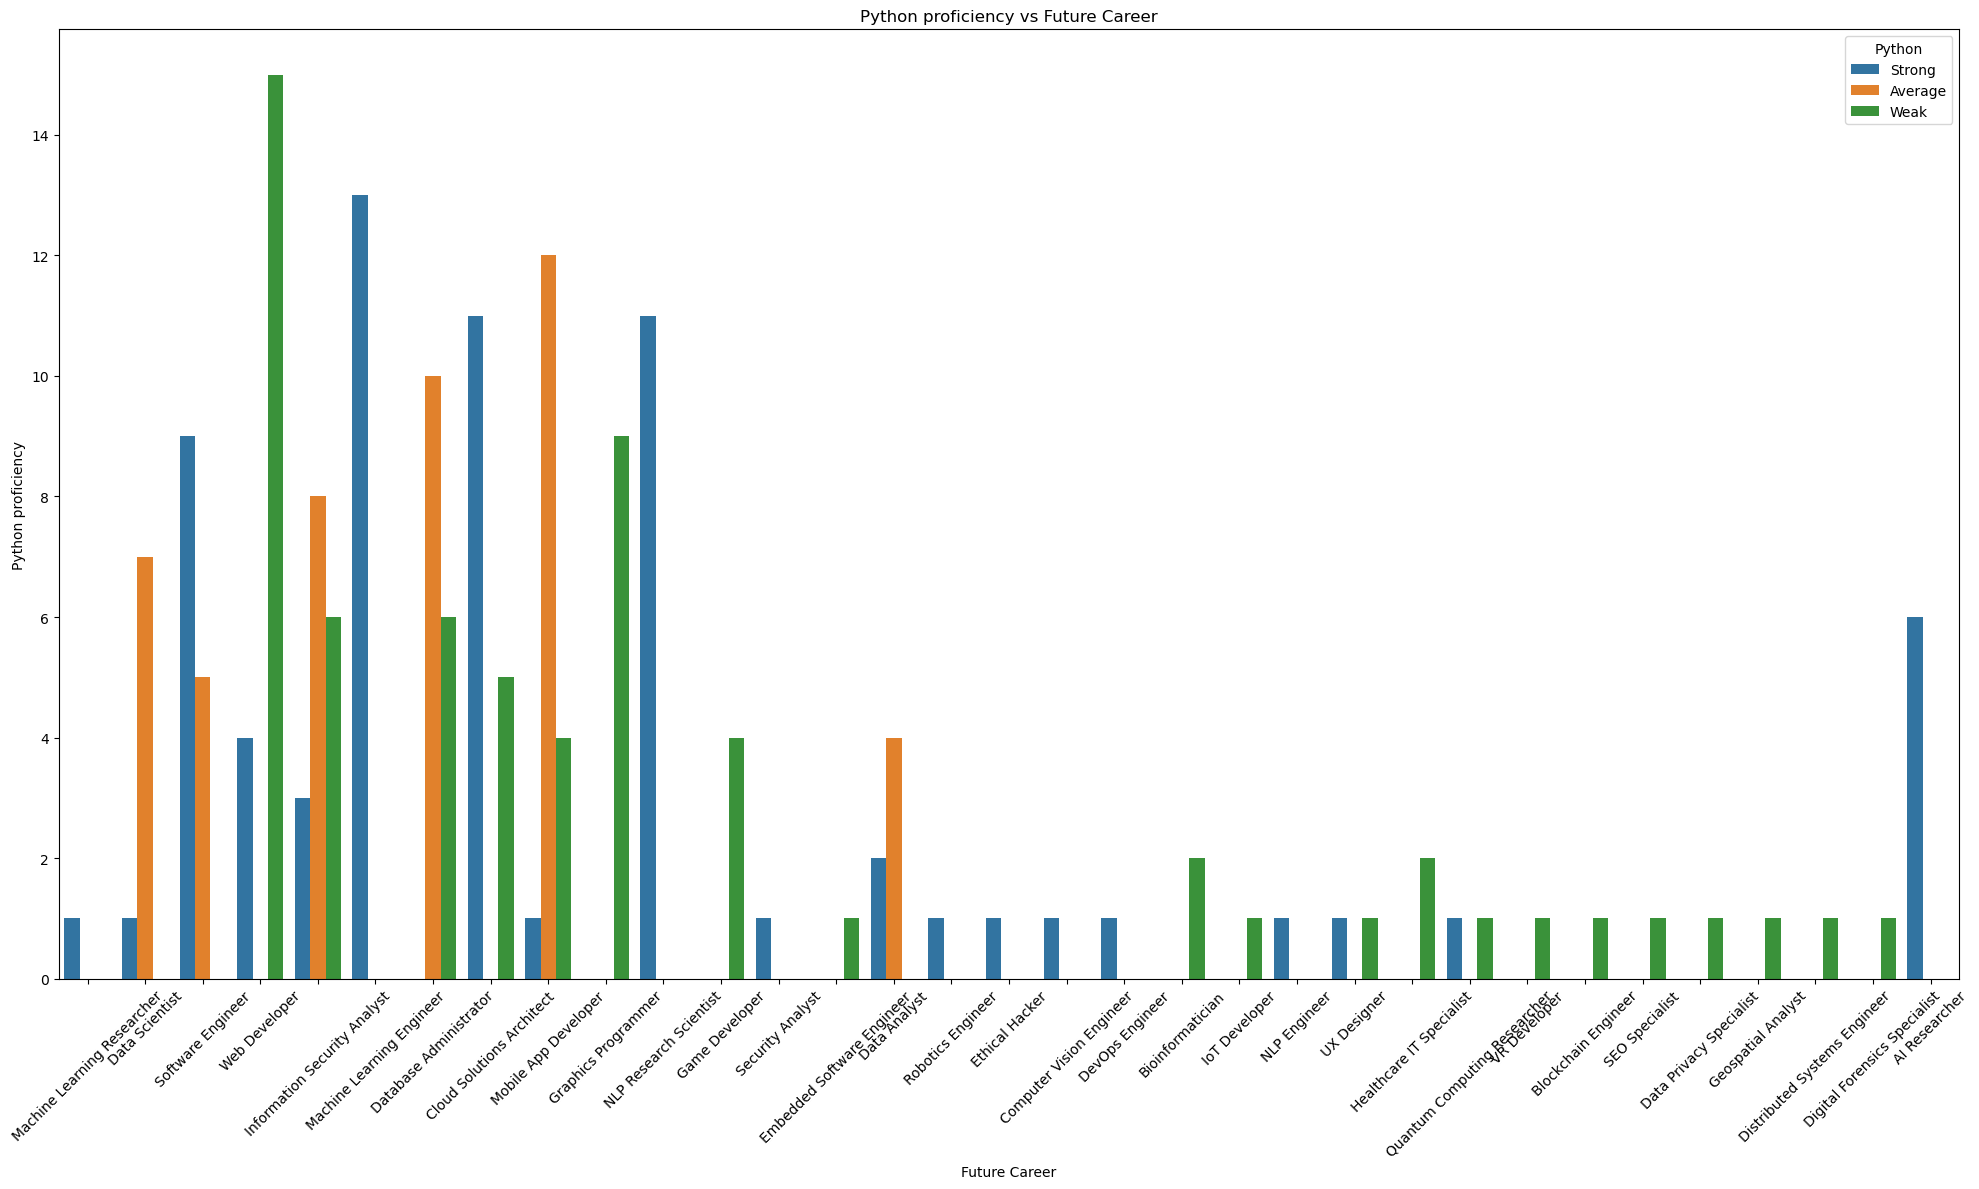

In [27]:
#Python proficiency vs Future Career
plt.figure(figsize=(20,12))
sns.countplot(data=df, x='Future Career', hue='Python')
plt.title('Python proficiency vs Future Career')
plt.xticks(rotation=45)
plt.xlabel('Future Career')
plt.ylabel('Python proficiency')
plt.tight_layout()
plt.show()

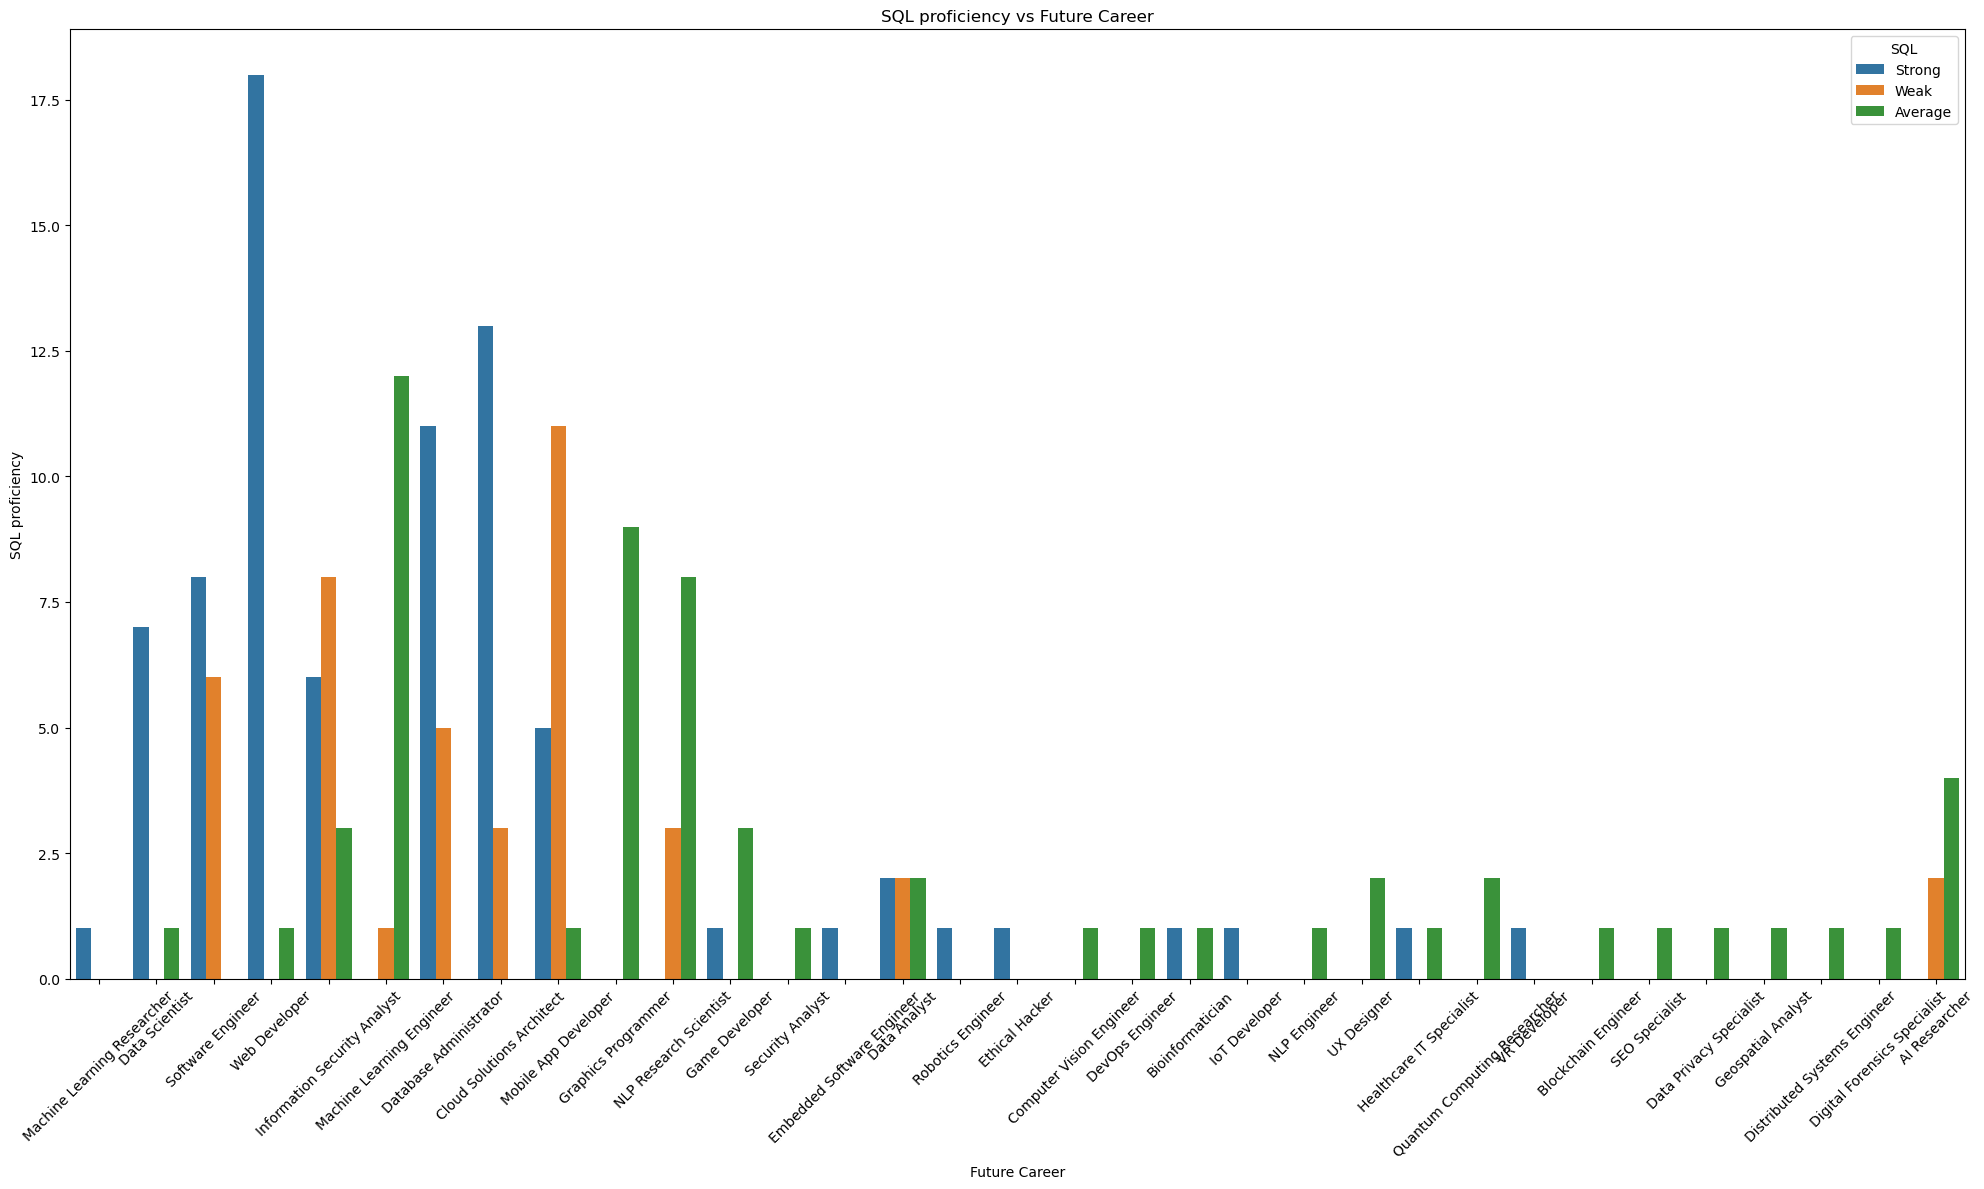

In [28]:
#SQL proficiency vs Future Career
plt.figure(figsize=(20,12))
sns.countplot(data=df, x='Future Career', hue='SQL')
plt.title('SQL proficiency vs Future Career')
plt.xticks(rotation=45)
plt.xlabel('Future Career')
plt.ylabel('SQL proficiency')
plt.tight_layout()
plt.show()

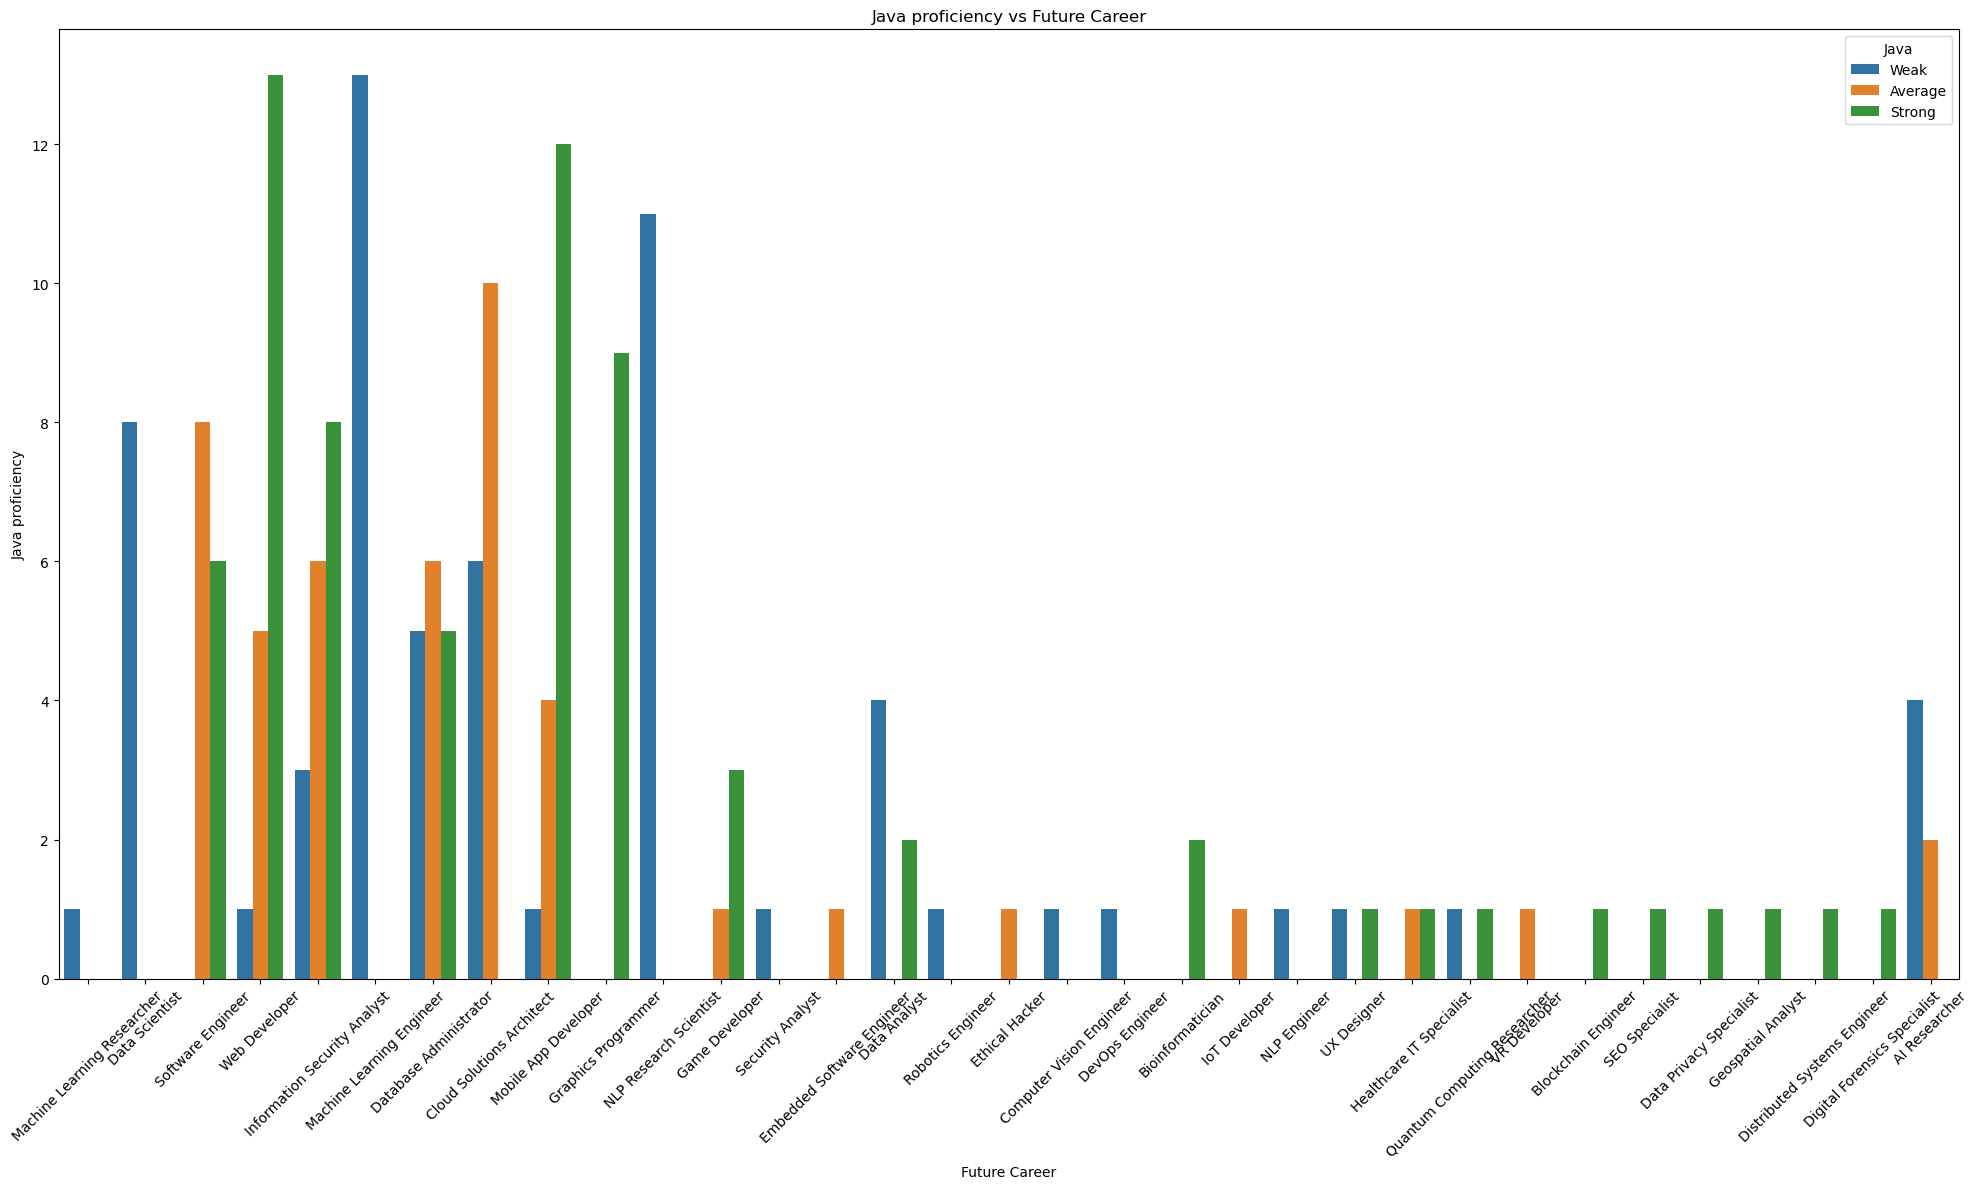

In [30]:
#Java proficiency vs Future Career
plt.figure(figsize=(20,12))
sns.countplot(data=df, x='Future Career', hue='Java')
plt.title('Java proficiency vs Future Career')
plt.xticks(rotation=45)
plt.xlabel('Future Career')
plt.ylabel('Java proficiency')
plt.tight_layout()
plt.show()